# Instructions:

Please provide python code in this notebook answering the 3 questions outlined below to the best of your ability.
Along with this file, you should have received a file called `data_science_task_dataset.csv` containing all the relevant data for this task.

- It should be possible to run the notebook you send back without any local/external dependencies (though feel free to use any python package which can be pip-installed).

- Make sure the notebook is broken up in sections so that it won't be too difficult to read or to know where each question is being answered. Extra points for tidiness and readability!

- Feel free to use any libraries you are comfortable with (as long as they are freely available through pip) for plotting, importing and manipulating data, etc.

- You are encouraged to leave in your thought process and any explorations you did, to show how you went about answering the questions.


# Data structure:

We have given you a (fake) dataset (in `.csv` format), simulating user sign ups to the Even website.

- Each row represents a sign up. However, any person signing up can add their family members, meaning that a row can contain information about multiple individuals. Fields containing commas (i.e. `ages`, `genders`, and `plans`), provide comma-separated information for each person who has been added. So, in the `plans` field: `PLUS, LITE, PLUS` means the person who originally signed up chose the Plus plan, the second person to be added picked Lite, and the third Plus again. This format applies to all fields containing individual level information. Other fields contain a single value which you can assume applies to the whole account/family (i.e. is not on an individual basis).


- Some rows are for users who have simply signed up but not paid whereas others will be for users who have also paid. You can tell who is which, since paid users will have non-blank values for `payment_time`.


- Fields have been labelled in a way that makes their contents easily understood. If something is not clear/unknown you can state whichever assumptions you have made in a "Preamble" in the notebook.


# Questions:

1. After playing around with the data a bit (please leave in a rough "Exploration" section showing how you did that :)), what do you think are 2 crucial data breakdowns or plots to be shown if you were presenting this data to the wider team? If you think multiple options are possible, feel free to say why you picked those 2.


2. Consider the fields `signup_time` and `payment_time`. They stand for the time a given user (who then may add multiple family members) signed up and then paid, respectively. In a single plot, how can you best show the distribution of time "deltas" between the sign up time and payment time (i.e. how long it takes for people to pay once they have signed up)? What is the best way to condense the relevant information and insights? Remember it needs to be a single, static plot, which ideally should not need to be magnified to make sense.


3. You are given the payment amounts but you don't know what the underlying price function is, and what its inputs are (though you can assume they are a subset of the given fields). If you had to treat this as a prediction problem, what kind of model would you use? **PLEASE DO NOT ACTUALLY ATTEMPT MODELLING**. Base your answer on any data exploration you did (and feel free to show plots/stats), but what we are looking is simply a discussion of what may be some of the modelling challenges here and how to pick a model which can overcome them.

In [ ]:
print('Good Luck!')

Good Luck!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Answer 1

In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/data_science_task_dataset.csv",usecols=['signup_time', 'ages', 'genders', 'plans', 'plan_months', 'payment_time', 'is_early_bird', 'payment_amount'])

In [ ]:
data.head(2)

,signup_time,ages,genders,plans,plan_months,payment_time,is_early_bird,payment_amount
0,2022-01-01 00:05:27,45,FEMALE,PLUS,12,NaN,False,0
1,2022-01-01 00:06:44,42,MALE,PLUS,12,NaN,False,0


In [ ]:
data.shape

(199740, 8)

In [3]:
#converting into date-time type
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['signup_date'] = data['signup_time'].dt.date
data['signup_time'] = data['signup_time'].dt.time

In [ ]:
data.head(2)

,signup_time,ages,genders,plans,plan_months,payment_time,is_early_bird,payment_amount,signup_date
0,00:05:27,45,FEMALE,PLUS,12,NaN,False,0,2022-01-01
1,00:06:44,42,MALE,PLUS,12,NaN,False,0,2022-01-01


In [4]:
paid_count = data['payment_time'].notna().sum()
# Counting the number of people who signed up but did not pay
not_paid_count = data['payment_time'].isna().sum()
print(f"Number of people who signed up and paid: {paid_count}")
print(f"Number of people who signed up but did not pay: {not_paid_count}")

Number of people who signed up and paid: 43338
Number of people who signed up but did not pay: 188981


In [5]:
paid_data = data[data['payment_time'].notna()]
not_paid_data = data[data['payment_time'].isna()]

In [6]:
paid_genders = paid_data['genders'].value_counts()
not_paid_genders = not_paid_data['genders'].value_counts()

In [7]:
paid_genders

genders
MALE                                                              14807
FEMALE                                                            14787
MALE, FEMALE                                                       2114
FEMALE, FEMALE                                                     2102
FEMALE, MALE                                                       2075
                                                                  ...  
FEMALE, MALE, MALE, MALE, FEMALE, MALE                                1
MALE, FEMALE, FEMALE, FEMALE, MALE, FEMALE                            1
MALE, MALE, FEMALE, FEMALE, FEMALE, MALE, FEMALE, MALE, FEMALE        1
FEMALE, MALE, FEMALE, MALE, MALE, FEMALE                              1
FEMALE, MALE, FEMALE, FEMALE, FEMALE, MALE                            1
Name: count, Length: 110, dtype: int64

In [8]:
#above we can find that multiple genders are there in one column hence to make it more human readable for analysis
data['ages'] = data['ages'].str.split(', ')
data['genders'] = data['genders'].str.split(', ')
data['plans'] = data['plans'].str.split(', ')

In [9]:
#using explode function such that for each age we have each gender associated and for each we have their plan
data_expanded = data.explode('ages').explode('genders').explode('plans')

In [10]:
data_expanded.head()

,signup_time,ages,genders,plans,plan_months,payment_time,is_early_bird,payment_amount,signup_date
0,00:05:27,45,FEMALE,PLUS,12,NaN,False,0,2022-01-01
1,00:06:44,42,MALE,PLUS,12,NaN,False,0,2022-01-01
2,00:17:55,52,MALE,PLUS,12,NaN,False,0,2022-01-01
3,00:20:45,48,MALE,PLUS,12,NaN,False,0,2022-01-01
4,00:27:36,61,MALE,LITE,12,NaN,False,0,2022-01-01


In [10]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
# Creating labels for the bins
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
# Binning the ages
data_expanded['age_bin'] = pd.cut(data_expanded['ages'].astype(int), bins=bins, labels=labels, right=False)
# Calculating age distribution of theee bins
age_distribution = data_expanded['age_bin'].value_counts().sort_index()
age_distribution

age_bin
0-18     169173
19-25    133062
26-35    721236
36-45    448558
46-55    195612
56-65    144978
66+           0
Name: count, dtype: int64

In [11]:
gender_distribution = data_expanded['genders'].value_counts()
print(gender_distribution)

genders
MALE      906575
FEMALE    906044
Name: count, dtype: int64


In [12]:
plan_distribution = data_expanded['plans'].value_counts()
print(plan_distribution)

plans
PLUS    1358147
LITE     454472
Name: count, dtype: int64


In [13]:
data['paid'] = data['payment_time'].notna()
paid_count = data['paid'].sum()
unpaid_count = len(data) - paid_count
print(f"Number of paid users: {paid_count}")
print(f"Number of unpaid users: {unpaid_count}")

Number of paid users: 43338
Number of unpaid users: 188981


In [14]:
age_plan_gender_distribution = data_expanded.groupby(['age_bin', 'plans', 'genders']).size().reset_index(name='count')
# Find the most common plan and gender per age bin
idx = age_plan_gender_distribution.groupby(['age_bin'])['count'].transform(max) == age_plan_gender_distribution['count']
most_common_per_age_bin = age_plan_gender_distribution[idx]

In [15]:
most_common_per_age_bin

,age_bin,plans,genders,count
3,0-18,PLUS,MALE,63481
6,19-25,PLUS,FEMALE,50152
10,26-35,PLUS,FEMALE,270536
15,36-45,PLUS,MALE,167781
19,46-55,PLUS,MALE,73423
23,56-65,PLUS,MALE,54660
24,66+,LITE,FEMALE,0
25,66+,LITE,MALE,0
26,66+,PLUS,FEMALE,0
27,66+,PLUS,MALE,0


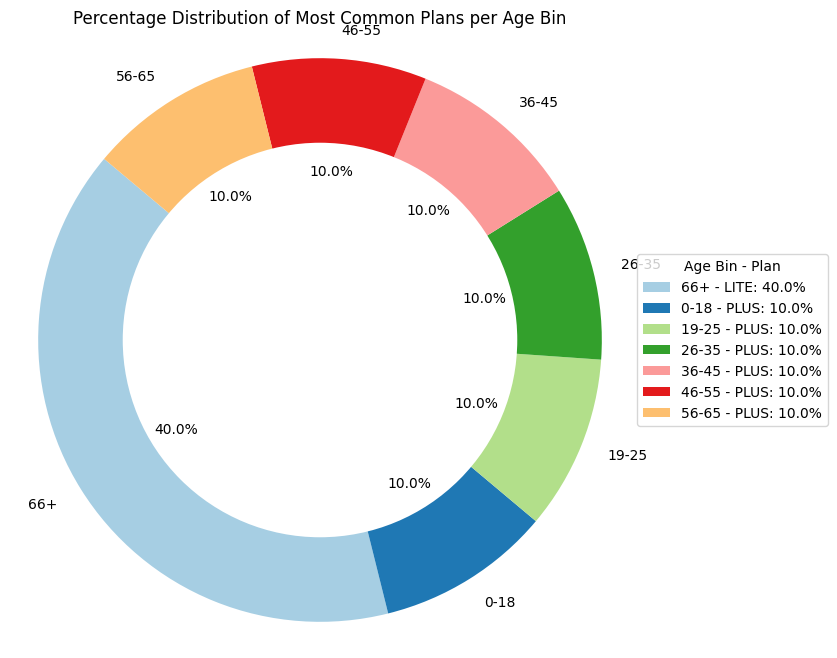

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculating the percentage distribution of each age bin
age_bin_counts = most_common_per_age_bin['age_bin'].value_counts(normalize=True) * 100
# Preparing data for the pie chart
pie_labels = age_bin_counts.index
pie_sizes = age_bin_counts.values
# Creating the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pie_labels))), wedgeprops=dict(width=0.4))
# Adding a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
# Adding title
plt.title('Percentage Distribution of Most Common Plans per Age Bin')
# Creating a legend
legend_labels = []
for age_bin in pie_labels:
    subset = most_common_per_age_bin[most_common_per_age_bin['age_bin'] == age_bin]
    plan = subset['plans'].values[0]
    percentage = age_bin_counts[age_bin]
    legend_labels.append(f"{age_bin} - {plan}: {percentage:.1f}%")
ax.legend(wedges, legend_labels, title="Age Bin - Plan", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# Equaling the aspect ratio as it ensures that pie is drawn as a circle
ax.axis('equal')
# Showing the plot
plt.show()

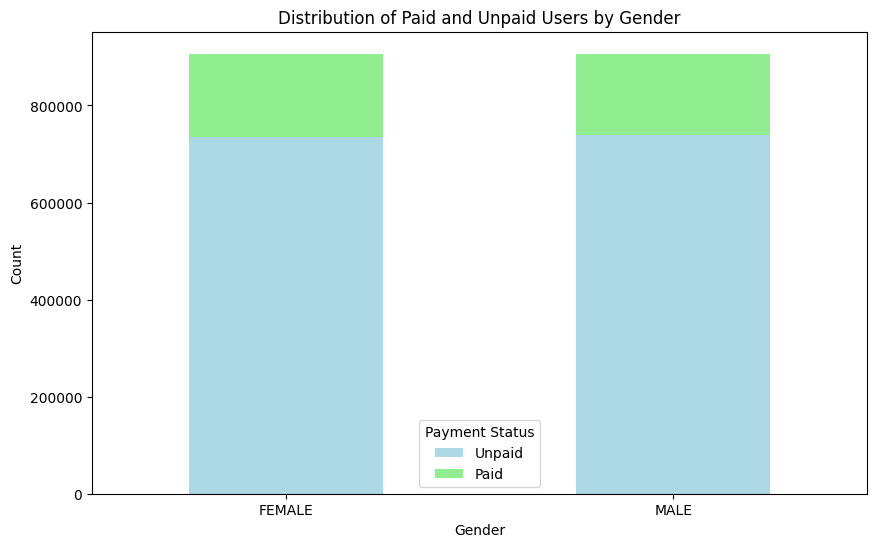

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Adding a new column to indicate whether the user paid or not
data_expanded['paid_status'] = data_expanded['payment_time'].notna().astype(int)
# Grouping by gender and paid_status and count occurrences
gender_paid_distribution = data_expanded.groupby(['genders', 'paid_status']).size().unstack().fillna(0)
# Renaming columns for better readability
gender_paid_distribution.columns = ['Unpaid', 'Paid']
# Plotting a stacked bar chart
ax = gender_paid_distribution.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'], figsize=(10, 6))
# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Paid and Unpaid Users by Gender')
plt.xticks(rotation=0)
# Adding legend
plt.legend(title='Payment Status')
# Showing the plot
plt.show()

### Answer 2

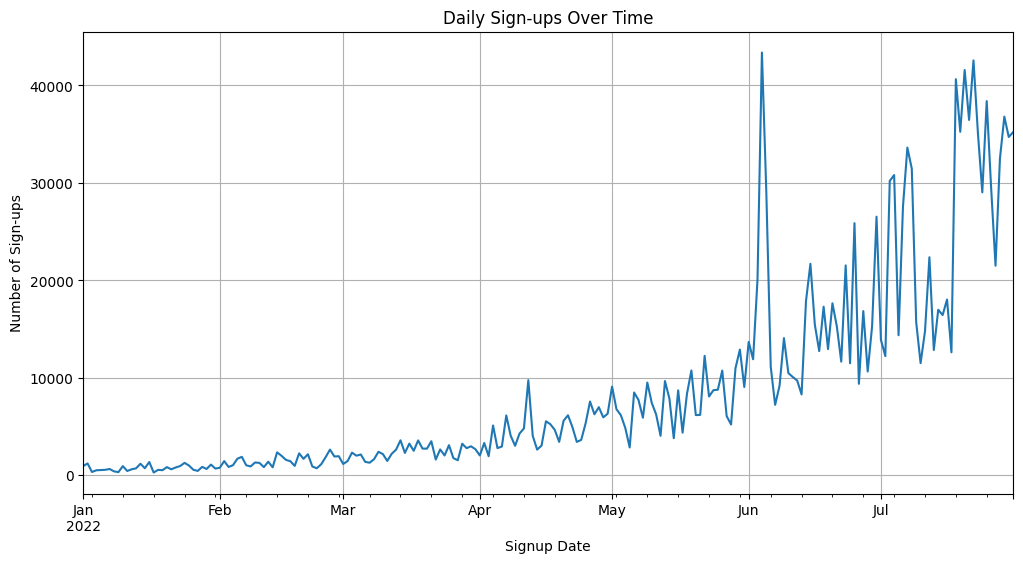

<Figure size 1200x600 with 0 Axes>

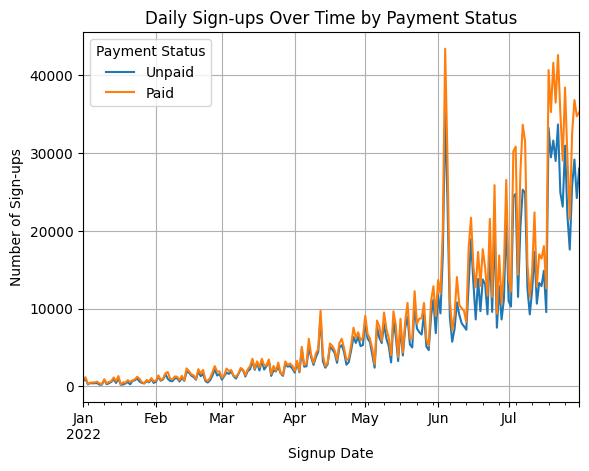

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Converting signup_date to datetime [just ensuring again]
data_expanded['signup_date'] = pd.to_datetime(data_expanded['signup_date'])
# Creating a column to indicate whether a payment was made or not
data_expanded['paid_status'] = data_expanded['payment_time'].notna().astype(int)
# Aggregating the data by signup_date to count the number of sign-ups per day
signup_counts = data_expanded['signup_date'].value_counts().sort_index()
# Plotting the time series for sign-ups
plt.figure(figsize=(12, 6))
signup_counts.plot()
plt.xlabel('Signup Date')
plt.ylabel('Number of Sign-ups')
plt.title('Daily Sign-ups Over Time')
plt.grid(True)
plt.show()

# Aggregating the data by signup_date and paid_status
signup_payment_counts = data_expanded.groupby(['signup_date', 'paid_status']).size().unstack().fillna(0)
# Renaming columns for better readability
signup_payment_counts.columns = ['Unpaid', 'Paid']
# Plotting the time series for sign-ups with payment status
plt.figure(figsize=(12, 6))
signup_payment_counts.plot(kind='line', stacked=True)
plt.xlabel('Signup Date')
plt.ylabel('Number of Sign-ups')
plt.title('Daily Sign-ups Over Time by Payment Status')
plt.grid(True)
plt.legend(title='Payment Status')
plt.show()

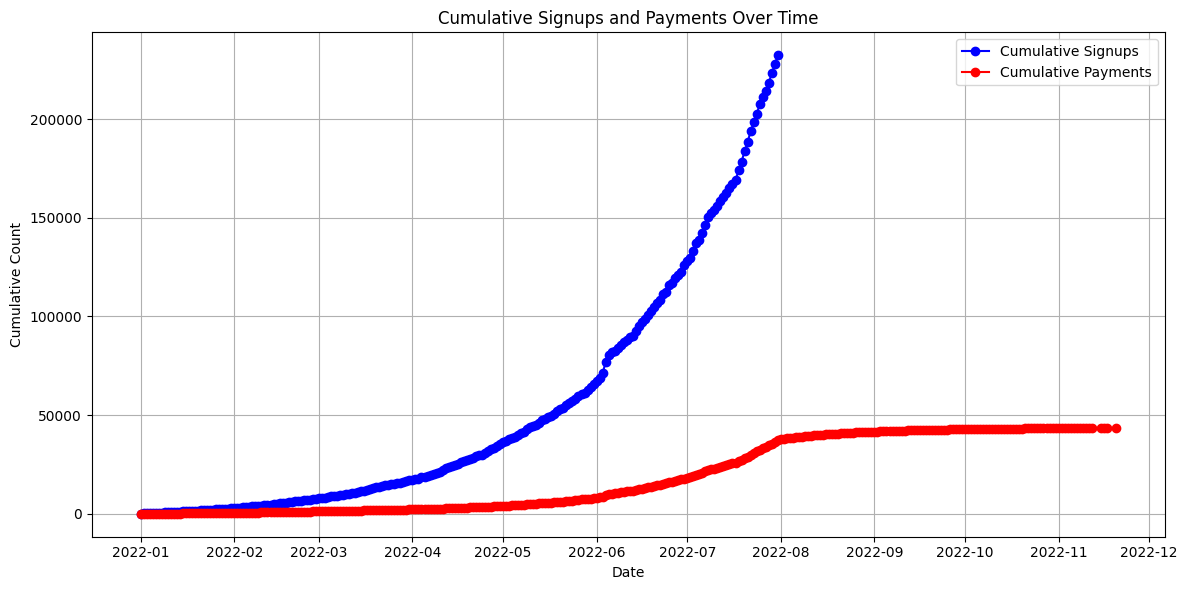

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
# Grouping by signup date and counting the number of signups per day
signup_counts = data.groupby(data['signup_time'].dt.date).size().cumsum()
# Grouping by payment date and counting the number of payments per day
payment_counts = data[data['payment_time'].notna()].groupby(data['payment_time'].dt.date).size().cumsum()
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(signup_counts.index, signup_counts.values, label='Cumulative Signups', marker='o', linestyle='-', color='b')
plt.plot(payment_counts.index, payment_counts.values, label='Cumulative Payments', marker='o', linestyle='-', color='r')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Signups and Payments Over Time')
plt.legend()
# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''
For Answer 1 : I would say bar graph is important as it shows what number of people in that too which gender converted from signed to paid
and donut chart showing for which age group which plan dominated most with what percentage

For Answer 2 : Time series graphs clearly shows the time gaps (deltas), we can see clearly till May signups increased, conversion of those paid were somewhat 0,
then around July and August we can see a rise

'''

### Answer 3

In [ ]:
'''

Firstly, for modelling we have a lot of aspects:

1) Data Distribution and Features:

The payment amounts may be influenced by various factors such as plan types (plans),
plan durations (plan_months), signup details (signup_time, signup_date), and
possibly demographic information (ages, genders).
The distribution of payment amounts could be highly skewed or
exhibit complex patterns, which might require careful preprocessing or
transformation to fit modeling assumptions.

2) Feature Engineering:
We can do feature engineering and then correlation analysis how those features fit in our model,
more the features higher the accuracy of tree based models
Also opposite for simple models,
can do PCA to get representation of two-three features into one variable

3) Model Selection:

Potential models could range from regression techniques (linear regression, decision trees) to more complex algorithms like gradient boosting machines (GBMs) or neural networks,
depending on the complexity of relationships between features and payment amounts.
Ensuring the model can capture non-linear relationships and interactions between features effectively without overfitting/underfitting is crucial.

Also for classification as accuracy might not be best metric, we gotta ensure other params also.
For regression based we have a lot of metrics as well, rmse, mse, mae to look out for.

4) Data Quality and Missing Values:

Handling missing values in features potentially incomplete demographic data (ages, genders) is necessary.
Imputation strategies or treating missing values as a separate category may be required.

5) Model Interpretability:

Interpreting the model predictions is essential for understanding which features contribute most significantly to payment amounts.
Black-box models like neural networks may offer high predictive accuracy but could be less interpretable compared
to simpler models like decision trees or linear regression.

6) My Model Recommendations:

Gradient Boosting Machines (GBMs):
These models handle complex interactions well and can often achieve high predictive accuracy
without extensive feature engineering. They can handle both numerical and categorical data effectively.

Random Forests:
Similar to GBMs but may be less prone to overfitting and
can provide insights into feature importance.

Linear Regression with Feature Engineering:
If relationships are found to be primarily linear or with simple interactions,
linear models with carefully engineered features could provide interpretable results.

Ensemble / Bagging / Boosting:
Can make models more robust by combing every model into one

Hence:

Thorough feature engineering to capture relevant aspects of signup details,
plan types, and demographic factors.
Testing multiple models to find the best balance between accuracy and interpretability.
Ensuring the selected model can handle potential outliers, missing data, and skewed distributions
in payment amounts.

'''